In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt

## Feature Engineering

See: https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423

Feature engineering is the 'art' of formulating useful features from existing data following the target to be learned and the machine learning model used. It involves transforming data to forms that better relate to the underlying target to be learned. When done right, feature engineering can augment the value of your existing data and improve the performance of your machine learning models. On the other hand, using bad features may require you to build much more complex models to achieve the same level of performance.

#### A first example

Consider the following dataset:

In [17]:
data = {'Candy Variety':['Chocolate Hears', 'Sour Jelly', 'Candy Canes', 'Sour Jelly', 'Fruit Drops'], 
        'Date and Time':['09-02-2020 14:05', '24-10-2020 18:00', '18-12-2020 20:13', '25-10-2020 10:00', '18-10-2020 15:46'],
       'Day':['Sunday', 'Saturday', 'Friday', 'Sunday', 'Sunday'],
       'Length':[3, 3.5, 3.5, 3.5, 5],
       'Breadth':[2, 2, 2.5, 2, 3],
       'Price':[7.5, 7.6, 8, 7.6, 9]}

df = pd.DataFrame(data)
# df['Date and Time'] = pd.to_datetime(df['Date and Time'], format="%d-%m-%Y %H:%M")

df

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hears,09-02-2020 14:05,Sunday,3.0,2.0,7.5
1,Sour Jelly,24-10-2020 18:00,Saturday,3.5,2.0,7.6
2,Candy Canes,18-12-2020 20:13,Friday,3.5,2.5,8.0
3,Sour Jelly,25-10-2020 10:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,18-10-2020 15:46,Sunday,5.0,3.0,9.0


- You have also been informed that the customers are uncompromising candy-lovers who consider their candy preference far more important than the price or even dimensions (essentially uncorrelated price, dimensions, and candy sales). What would you do when you are asked to predict which kind of candy is most likely to sell the most on a particular day?
- Then, the variety of candy ordered would depend more on the date than on the time of the day it was ordered and also that the sales for a particular variety of candy would vary according to the season. 

Now that you instinctively know what features would most likely contribute to your predictions, let's go ahead and present our data better by simply creating a new feature Date from the existing feature Date and Time.

In [3]:
df['Date'] = df['Date and Time'].dt.date
df[['Date and Time', 'Date']]

,Date and Time,Date
0,2020-02-09 14:05:00,2020-02-09
1,2020-10-24 18:00:00,2020-10-24
2,2020-12-18 20:13:00,2020-12-18
3,2020-10-25 10:00:00,2020-10-25
4,2020-10-18 15:46:00,2020-10-18


- The table you have obtained as a result should definitely make it at least a tad bit simpler for you to predict that Sour Jellies are most likely to sell, especially around the end of October (Halloween!) given the very same input data…
- In addition, if you wanted to know more about the weekend and weekday sale trends, in particular, you could categorize the days of the week in a feature called Weekend with 1=True and 0=False 

In [4]:
df['Weekend'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 1, 0)
df[['Candy Variety', 'Date', 'Weekend']]

,Candy Variety,Date,Weekend
0,Chocolate Hears,2020-02-09,1
1,Sour Jelly,2020-10-24,1
2,Candy Canes,2020-12-18,0
3,Sour Jelly,2020-10-25,1
4,Fruit Drops,2020-10-18,1


### Feature Engineering Techniques

#### Imputation 

Imputation deals with handling missing values in data. While deleting records that are missing certain values is one way of dealing with this issue, it could also mean losing out on a chunk of valuable data. This is where imputation can help. It can be broadly classified into two types. Namely:

- Categorical Imputation: Missing categorical values are generally replaced by the most commonly occurring value in other records
- Numerical Imputation: Missing numerical values are generally replaced by the mean of the corresponding value in other records

The technique of imputation given above corresponds with the principle of normal distribution (where the values in the distribution are more likely to occur closer to the mean rather than the edges) which results in a fairly good estimate of missing data. A few other ways to go about this include replacing missing values by picking the value from a normal distribution with the mean and standard deviation of the corresponding existing values or even replacing the missing value with an arbitrary value.

However, one must be reasonably cautious when using this technique because retention of data size with this technique could come at the cost of deterioration of data quality. For example, say in the above candy problem you were given 5 records instead of one with the 'Candy Variety' missing. Using the above technique you would predict the missing values as 'Sour Jelly' resulting in possibly predicting the high sales of Sour Jellies all through the year!  Therefore, it is wise to filter out records that have greater than a certain number of missing values or certain critical values missing and apply your discretion depending on the size and quality of data you are working with.



In [18]:
# Append row with missing values
df.loc[len(df.index)] = [np.NaN, '22-10-2020 17:24', 'Thursday', 3.5, 2, np.NaN]

df

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hears,09-02-2020 14:05,Sunday,3.0,2.0,7.5
1,Sour Jelly,24-10-2020 18:00,Saturday,3.5,2.0,7.6
2,Candy Canes,18-12-2020 20:13,Friday,3.5,2.5,8.0
3,Sour Jelly,25-10-2020 10:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,18-10-2020 15:46,Sunday,5.0,3.0,9.0
5,NaN,22-10-2020 17:24,Thursday,3.5,2.0,NaN


In [19]:
df['Candy Variety'] = df['Candy Variety'].fillna(df['Candy Variety'].mode()[0])
df['Price'] = df['Price'].fillna(df['Price'].mean())

df

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hears,09-02-2020 14:05,Sunday,3.0,2.0,7.50
1,Sour Jelly,24-10-2020 18:00,Saturday,3.5,2.0,7.60
2,Candy Canes,18-12-2020 20:13,Friday,3.5,2.5,8.00
3,Sour Jelly,25-10-2020 10:00,Sunday,3.5,2.0,7.60
4,Fruit Drops,18-10-2020 15:46,Sunday,5.0,3.0,9.00
5,Sour Jelly,22-10-2020 17:24,Thursday,3.5,2.0,7.94


#### Discretization 

Discretization involves essentially taking a set of values of data and grouping sets of them together in some logical fashion into bins (or buckets). Binning can apply to numerical values as well as to categorical values. This could help prevent data from overfitting but comes at the cost of loss of granularity of data. The grouping of data can be done as follows:

- Grouping of equal intervals
- Grouping based on equal frequencies (of observations in the bin)
- Grouping based on decision tree sorting (to establish a relationship with target)

In [20]:
df['Type of Day'] = np.where(df['Day'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')
df[['Candy Variety', 'Day', 'Type of Day']]

,Candy Variety,Day,Type of Day
0,Chocolate Hears,Sunday,Weekend
1,Sour Jelly,Saturday,Weekend
2,Candy Canes,Friday,Weekday
3,Sour Jelly,Sunday,Weekend
4,Fruit Drops,Sunday,Weekend
5,Sour Jelly,Thursday,Weekday


#### Categorical Encoding

- Categorical encoding is the technique used to encode categorical features into numerical values which are usually simpler for an algorithm to understand. One-hot-encoding (OHE) is a popularly used technique of categorical encoding. Here, categorical values are converted into simple numerical 1's and 0's without the loss of information. As with other techniques, OHE has its own disadvantages and has to be used sparingly. It could result in a dramatic increase in the number of features and result in the creation of highly correlated features. 
- Besides OHE there are other methods of categorical encodings, such as:
    1. Count and Frequency encoding - captures each label's representation 
    2. Mean encoding - establishes the relationship with the target 
    3. Ordinal encoding - number assigned to each unique label.

In [21]:
for x in df['Type of Day'].unique():
    df[x] = np.where(df['Type of Day']==x, 1, 0)

df[['Candy Variety', 'Day', 'Type of Day', 'Weekend', 'Weekday']]

,Candy Variety,Day,Type of Day,Weekend,Weekday
0,Chocolate Hears,Sunday,Weekend,1,0
1,Sour Jelly,Saturday,Weekend,1,0
2,Candy Canes,Friday,Weekday,0,1
3,Sour Jelly,Sunday,Weekend,1,0
4,Fruit Drops,Sunday,Weekend,1,0
5,Sour Jelly,Thursday,Weekday,0,1


#### Feature Splitting 

Splitting features into parts can sometimes improve the value of the features toward the target to be learned. For instance, in this case, Date better contributes to the target function than Date and Time.

In [22]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'], format="%d-%m-%Y %H:%M")
df['Date'] = df['Date and Time'].dt.date
df[['Candy Variety', 'Date and Time', 'Date']]

,Candy Variety,Date and Time,Date
0,Chocolate Hears,2020-02-09 14:05:00,2020-02-09
1,Sour Jelly,2020-10-24 18:00:00,2020-10-24
2,Candy Canes,2020-12-18 20:13:00,2020-12-18
3,Sour Jelly,2020-10-25 10:00:00,2020-10-25
4,Fruit Drops,2020-10-18 15:46:00,2020-10-18
5,Sour Jelly,2020-10-22 17:24:00,2020-10-22


#### Handling Outliers

Outliers are unusually high or low values in the dataset which are unlikely to occur in normal scenarios. Since these outliers could adversely affect your prediction they must be handled appropriately. The various methods of handling outliers include:

- Removal: The records containing outliers are removed from the distribution. However, the presence of outliers over multiple variables could result in losing out on a large portion of the datasheet with this method.
- Replacing values: The outliers could alternatively be treated as missing values and replaced by using appropriate imputation.
- Capping: Capping the maximum and minimum values and replacing them with an arbitrary value or a value from a variable distribution.
- Discretization

#### Variable Transformations

Variable transformation techniques could help with normalizing skewed data. One such popularly used transformation is the logarithmic transformation. Logarithmic transformations operate to compress the larger numbers and relatively expand the smaller numbers. This in turn results in less skewed values especially in the case of heavy-tailed distributions. Other variable transformations used include Square root transformation and Box cox transformation which is a generalization of the former two.



#### Scaling

Feature scaling is done owing to the sensitivity of some machine learning algorithms to the scale of the input values. This technique of feature scaling is sometimes referred to as feature normalization. The commonly used processes of scaling include:

    1. Min-Max Scaling: This process involves the rescaling of all values in a feature in the range 0 to 1. In other words, the minimum value in the original range will take the value 0, the maximum value will take 1 and the rest of the values in between the two extremes will be appropriately scaled.
    2. Standardization/Variance scaling: All the data points are subtracted by their mean and the result divided by the distribution's variance to arrive at a distribution with a 0 mean and variance of 1.
    
It is necessary to be cautious when scaling sparse data using the above two techniques as it could result in additional computational load.

#### Creating Features

Feature creation involves deriving new features from existing ones. This can be done by simple mathematical operations such as aggregations to obtain the mean, median, mode, sum, or difference and even product of two values. These features, although derived directly from the given data, when carefully chosen to relate to the target can have an impact on the performance!


## Example: Simple price prediction for Candy Sales


- Consider the previously introduced candy dataset. Let’s consider a simple price prediction problem for our candy sales data.
- We will use a simple linear regression model to predict the price of the various types of candies and experience first-hand how to implement python feature engineering.

Let’s start by building a function to calculate the coefficients using the standard formula for calculating the slope and intercept for our simple linear regression model. 

In [23]:
data = {'Candy Variety':['Chocolate Hears', 'Sour Jelly', 'Candy Canes', 'Sour Jelly', 'Fruit Drops'], 
        'Date and Time':['09-02-2020 14:05', '24-10-2020 18:00', '18-12-2020 20:13', '25-10-2020 10:00', '18-10-2020 15:46'],
       'Day':['Sunday', 'Saturday', 'Friday', 'Sunday', 'Sunday'],
       'Length':[3, 3.5, 3.5, 3.5, 5],
       'Breadth':[2, 2, 2.5, 2, 3],
       'Price':[7.5, 7.6, 8, 7.6, 9]}

df = pd.DataFrame(data)
df

,Candy Variety,Date and Time,Day,Length,Breadth,Price
0,Chocolate Hears,09-02-2020 14:05,Sunday,3.0,2.0,7.5
1,Sour Jelly,24-10-2020 18:00,Saturday,3.5,2.0,7.6
2,Candy Canes,18-12-2020 20:13,Friday,3.5,2.5,8.0
3,Sour Jelly,25-10-2020 10:00,Sunday,3.5,2.0,7.6
4,Fruit Drops,18-10-2020 15:46,Sunday,5.0,3.0,9.0


In [24]:
def simple_linear_regression(x, y):
    n = np.size(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    xy = np.sum(y*x) - n*mean_y*mean_x
    xx = np.sum(x*x) - n*mean_x*mean_x
    
    m = xy/xx
    c = mean_y - m*mean_x
    
    return m, c

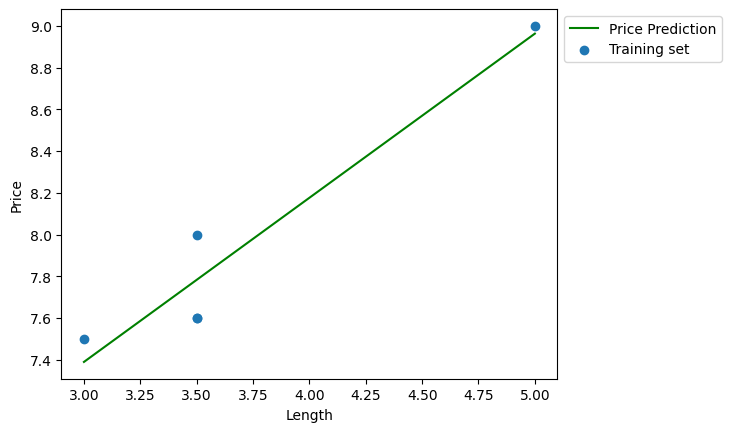

In [25]:
x = df['Length'].to_numpy()
y = df['Price'].to_numpy()

m, c = simple_linear_regression(x, y)
y_pred = c + m*x

plt.plot(x, y_pred, color = 'g', label = 'Price Prediction')
plt.scatter(df['Length'].to_numpy(), y, marker = 'o', label = 'Training set')
plt.xlabel('Length')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- We observe from the figure that Length does not have a particularly linear relation with the price.
We attempt a similar prediction with the Breadth to get a somewhat similar outcome.

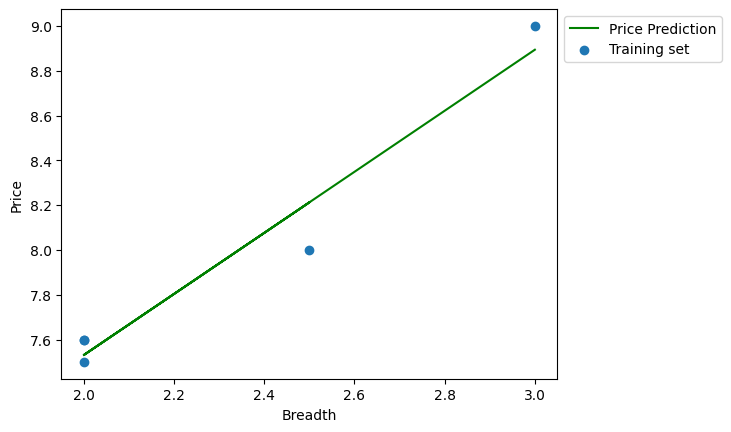

In [26]:
x = df['Breadth'].to_numpy()
y = df['Price'].to_numpy()

m, c = simple_linear_regression(x, y)
y_pred = c + m*x

plt.plot(x, y_pred, color = 'g', label = 'Price Prediction')
plt.scatter(df['Breadth'].to_numpy(), y, marker = 'o', label = 'Training set')
plt.xlabel('Breadth')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- Finally, it’s time to apply our newly gained knowledge of Feature Engineering! Instead of using just the given features, we use the Length and Breadth feature to derive a new feature called Size which (you might have already guessed) should have a much more monotonic relation with the Price of candy than the two features it was derived from.

In [27]:
df['Size'] = df['Breadth']*df['Length']
df[['Candy Variety', 'Price', 'Size']]

,Candy Variety,Price,Size
0,Chocolate Hears,7.5,6.00
1,Sour Jelly,7.6,7.00
2,Candy Canes,8.0,8.75
3,Sour Jelly,7.6,7.00
4,Fruit Drops,9.0,15.00


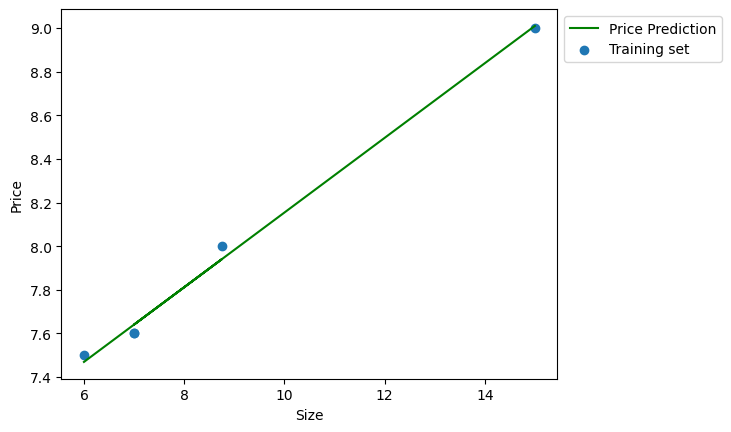

In [28]:
x = df['Size'].to_numpy()
y = df['Price'].to_numpy()

m, c = simple_linear_regression(x, y)
y_pred = c + m*x

plt.plot(x, y_pred, color = 'g', label = 'Price Prediction')
plt.scatter(df['Size'].to_numpy(), y, marker = 'o', label = 'Training set')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Example:

https://www.kdnuggets.com/2018/12/feature-engineering-explained.html

In [35]:
import math

In [37]:
math.factorial(6) - math.factorial(4)*10

480

In [39]:
math.factorial(4)*4*8

768

In [40]:
15/27

0.5555555555555556